In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read in the data
df = pd.read_csv('../notebooks/data/merged_inputed_data.csv')

In [3]:
# create list with column names that start with 'meds' and ends with _0, _1, _2, _3, _4
meds = [col for col in df.columns if col.startswith('meds') and col.endswith(('_0', '_1', '_2', '_3', '_4'))]

tests = [col for col in df.columns if col.startswith('test') and col.endswith(('_0', '_1', '_2', '_3', '_4'))]

surveys = [col for col in df.columns if col.startswith('survey') and col.endswith(('_0', '_4'))]

data = df[meds+tests+surveys+['CNT']]

data

,meds_methadone_0,meds_buprenorphine_0,meds_methadone_1,meds_buprenorphine_1,meds_methadone_2,meds_buprenorphine_2,meds_methadone_3,meds_buprenorphine_3,meds_methadone_4,meds_buprenorphine_4,...,survey_propoxyphene_0,survey_cannabis_4,survey_oxycodone_4,survey_methadone_4,survey_amphetamine_4,survey_methamphetamine_4,survey_opiates_4,survey_benzodiazepines_4,survey_propoxyphene_4,CNT
0,0.0,8.0,0.0,160.0,0.0,320.0,0.0,192.0,0.0,384.0,...,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,8
1,0.0,8.0,0.0,48.0,0.0,48.0,0.0,60.0,0.0,48.0,...,0.0,1.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,4
2,30.0,0.0,170.0,0.0,310.0,0.0,420.0,0.0,360.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0
3,0.0,16.0,0.0,152.0,0.0,192.0,0.0,160.0,0.0,64.0,...,0.0,2.0,0.0,0.0,0.0,0.0,6.0,1.0,0.0,1
4,0.0,16.0,0.0,8.0,0.0,8.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1300,30.0,0.0,270.0,0.0,390.0,0.0,560.0,0.0,420.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,29.0,0.0,0.0,10
1301,0.0,8.0,0.0,32.0,0.0,64.0,0.0,80.0,0.0,96.0,...,0.0,27.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0
1302,30.0,0.0,690.0,0.0,1460.0,0.0,100.0,0.0,1400.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
1303,110.0,0.0,270.0,0.0,250.0,0.0,300.0,0.0,360.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10


In [5]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

X, y = data.drop('CNT', axis=1), data['CNT']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_withconstant = sm.add_constant(X_train)

# instantiate model
model = sm.OLS(y_train, X_withconstant)

# fit model
results = model.fit()

# print summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    CNT   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     10.58
Date:                Thu, 18 Jan 2024   Prob (F-statistic):           3.70e-81
Time:                        12:59:49   Log-Likelihood:                -3015.1
No. Observations:                 978   AIC:                             6182.
Df Residuals:                     902   BIC:                             6553.
Df Model:                          75                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [10]:
# make predictions
y_train_pred = results.predict(X_withconstant)

# calculate r2 score
r2_score(y_train, y_train_pred)

# calculate mean squared error
mean_squared_error(y_train, y_train_pred)
print('MSE: {}'.format(mean_squared_error(y_train, y_train_pred)))

# calculate mean absolute error
mean_absolute_error(y_train, y_train_pred)
print('MAE: {}'.format(mean_absolute_error(y_train, y_train_pred)))

MSE: 27.881115722545616
MAE: 3.903169121013239


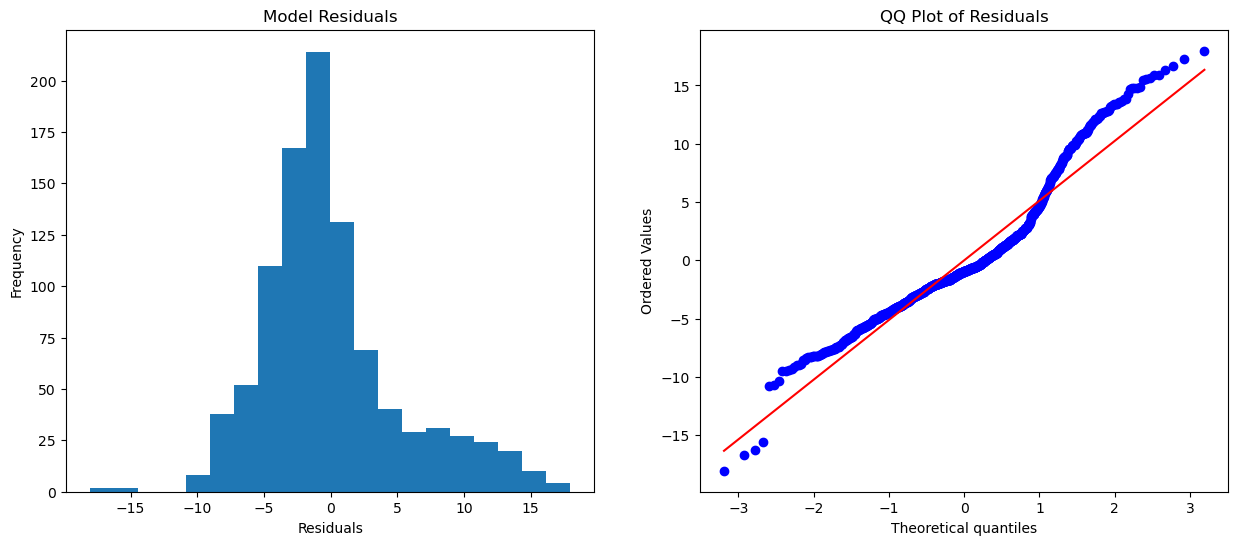

In [20]:
from scipy import stats

model_resids = results.resid

# Calculate residuals
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot histogram of residuals
ax1.hist(model_resids, bins=20)
ax1.set_title('Model Residuals')
ax1.set_xlabel('Residuals')
ax1.set_ylabel('Frequency')

# Plot QQ plot of residuals
stats.probplot(model_resids, dist="norm", plot=ax2)
ax2.set_title('QQ Plot of Residuals')

plt.show()
